<a href="https://colab.research.google.com/github/KatherLab/synth-user-study/blob/main/analyze_glide_observer_study_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

analysis of observer responses in user study of generated images with GLIDE, 2022

In [1]:
# imports
import os 
import pandas as pd
import scipy as sp
from scipy import stats
import numpy as np
from matplotlib import pyplot as plt
from google.colab import files    # for file download

# define settings
path_input = "/content/inputdata"
path_output = "/content/outputdata"

# create directories as needed
os.makedirs(path_input) if not os.path.exists(path_input) else None
os.makedirs(path_output) if not os.path.exists(path_output) else None

# download the raw dataset
!wget -c -P /content/inputdata/ https://raw.githubusercontent.com/KatherLab/synth-user-study/main/observer_study_glide_v1_merge.xlsx

--2022-01-05 23:37:55--  https://raw.githubusercontent.com/KatherLab/synth-user-study/main/observer_study_glide_v1_merge.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 43946 (43K) [application/octet-stream]
Saving to: ‘/content/inputdata/observer_study_glide_v1_merge.xlsx’

observer_study_glid 100%[===================>]  42.92K  --.-KB/s    in 0.006s  

2022-01-05 23:37:56 (6.80 MB/s) - ‘/content/inputdata/observer_study_glide_v1_merge.xlsx’ saved [43946/43946]



In [2]:
t1 = pd.read_excel(os.path.join(path_input,"observer_study_glide_v1_merge.xlsx"), sheet_name="matrix_nonsensical_as_zero")
allcols = t1.columns
print(allcols)

cols_style = pd.Index(['microscopy style', 'histopath style', 'x-ray img. style', 'MR image style', 'CT image style', 'photograph style', 'sci poster style', 'illustration style'])
cols_content = pd.Index(['microscopy content', 'histopath content', 'x-ray img. content', 'MR image content', 'CT image content', 'photograph content', 'sci poster content', 'illustration content'])


Index(['prompt', 'microscopy style', 'microscopy content', 'histopath style',
       'histopath content', 'x-ray img. style', 'x-ray img. content',
       'MR image style', 'MR image content', 'CT image style',
       'CT image content', 'photograph style', 'photograph content',
       'sci poster style', 'sci poster content', 'illustration style',
       'illustration content'],
      dtype='object')


[2. 3. 1. 0. 0. 2. 3. 3.]
<class 'numpy.ndarray'>
[2. 2. 1. 0. 0. 2. 1. 2.]
<class 'numpy.ndarray'>


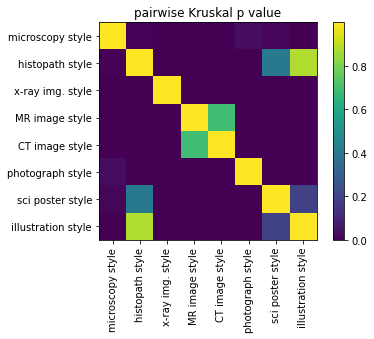

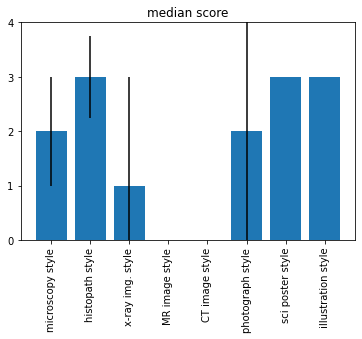

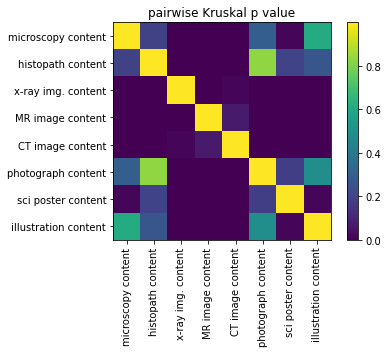

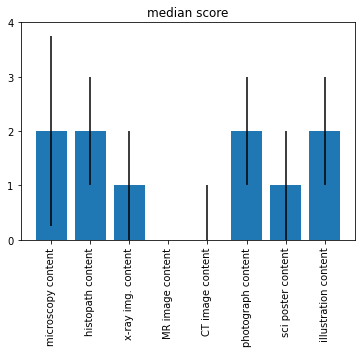

In [7]:
for mycols in [cols_style, cols_content]:

  # preallocate
  p_vals = np.zeros((len(mycols),len(mycols)),dtype=float)
  m_vals = np.zeros((len(mycols)),dtype=float)
  q_vals = np.zeros((len(mycols)),dtype=float)

  for i,item in enumerate(mycols):
    m_vals[i] = np.median(t1[item]) # median
    q_vals[i] = np.subtract(*np.percentile(t1[item], [75, 25])) # IQR
    for j,jtem in enumerate(mycols):
      p_vals[i,j] = stats.kruskal(t1[item], t1[jtem]).pvalue


  fig,ax = plt.subplots()
  img1 = ax.imshow(p_vals, interpolation='nearest')
  cb = fig.colorbar(img1)
  plt.xticks(np.arange(len(mycols)), mycols.str.replace("_"," "),rotation=90) 
  plt.yticks(np.arange(len(mycols)), mycols.str.replace("_"," "))
  plt.title("pairwise Kruskal p value")
  plt.savefig(os.path.join(path_output,mycols[0]+"pvals.svg"), format="svg",bbox_inches='tight')

  print(m_vals)
  print(type(m_vals))

  fig,ax = plt.subplots()
  plt.bar(mycols.str.replace("_"," "),m_vals,yerr=q_vals)
  plt.xticks(rotation=90) 
  plt.yticks([0,1,2,3,4]) 
  ax.set_ylim([0, 4])
  plt.title("median score")
  plt.savefig(os.path.join(path_output,mycols[0]+"medians.svg"), format="svg",bbox_inches='tight')

